# Supervisely Data Labelling Example: Keypoints

## Installation & Importing Necessary Libraries

In [2]:
# import necessary libraries
import supervisely as sly
from supervisely.geometry.graph import Node, KeypointsTemplate
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import json
from dotenv import load_dotenv

## Working With Keypoints Template

In [3]:
# function for image visualization
def visualize_image(image_filepath):
    plt.figure(figsize=(12, 8))
    image = mpimg.imread(image_filepath)
    imageplot = plt.imshow(image)
    plt.axis("off")
    plt.show()

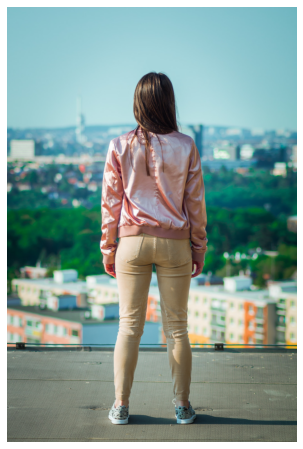

In [5]:
# visualize image for building keypoints template
visualize_image("images/girl.jpg")

In [ ]:
# create keypoints template
template = KeypointsTemplate()

In [ ]:
# add nodes
template.add_point(label="nose", row=635, col=427)
template.add_point(label="left_eye", row=597, col=404)
template.add_point(label="right_eye", row=685, col=401)
template.add_point(label="left_ear", row=575, col=431)
template.add_point(label="right_ear", row=723, col=425)
template.add_point(label="left_shoulder", row=502, col=614)
template.add_point(label="right_shoulder", row=794, col=621)
template.add_point(label="left_elbow", row=456, col=867)
template.add_point(label="right_elbow", row=837, col=874)
template.add_point(label="left_wrist", row=446, col=1066)
template.add_point(label="right_wrist", row=845, col=1073)
template.add_point(label="left_hip", row=557, col=1035)
template.add_point(label="right_hip", row=743, col=1043)
template.add_point(label="left_knee", row=541, col=1406)
template.add_point(label="right_knee", row=751, col=1421)
template.add_point(label="left_ankle", row=501, col=1760)
template.add_point(label="right_ankle", row=774, col=1765)

In [ ]:
# add edges
template.add_edge(src="left_ankle", dst="left_knee")
template.add_edge(src="left_knee", dst="left_hip")
template.add_edge(src="right_ankle", dst="right_knee")
template.add_edge(src="right_knee", dst="right_hip")
template.add_edge(src="left_hip", dst="right_hip")
template.add_edge(src="left_shoulder", dst="left_hip")
template.add_edge(src="right_shoulder", dst="right_hip")
template.add_edge(src="left_shoulder", dst="right_shoulder")
template.add_edge(src="left_shoulder", dst="left_elbow")
template.add_edge(src="right_shoulder", dst="right_elbow")
template.add_edge(src="left_elbow", dst="left_wrist")
template.add_edge(src="right_elbow", dst="right_wrist")
template.add_edge(src="left_eye", dst="right_eye")
template.add_edge(src="nose", dst="left_eye")
template.add_edge(src="nose", dst="right_eye")
template.add_edge(src="left_eye", dst="left_ear")
template.add_edge(src="right_eye", dst="right_ear")
template.add_edge(src="left_ear", dst="left_shoulder")
template.add_edge(src="right_ear", dst="right_shoulder")

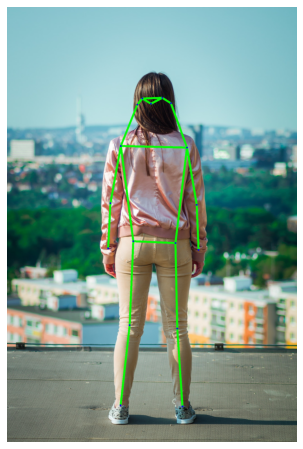

In [7]:
# visualize your keypoints template
template_img = sly.image.read("images/girl.jpg")
template.draw(image=template_img)
sly.image.write("images/template.jpg", template_img)
visualize_image("images/template.jpg")

In [ ]:
# you can also transfer your template to json
template_json = template.to_json()

## Programmatically Create Keypoints Annotation

In [ ]:
# authentication
# learn more here - https://developer.supervise.ly/getting-started/first-steps/basics-of-authentication
load_dotenv(os.path.expanduser("~/supervisely.env"))
api = sly.Api.from_env()
my_teams = api.team.get_list()
team = my_teams[0]
workspace = api.workspace.get_list(team.id)[0]

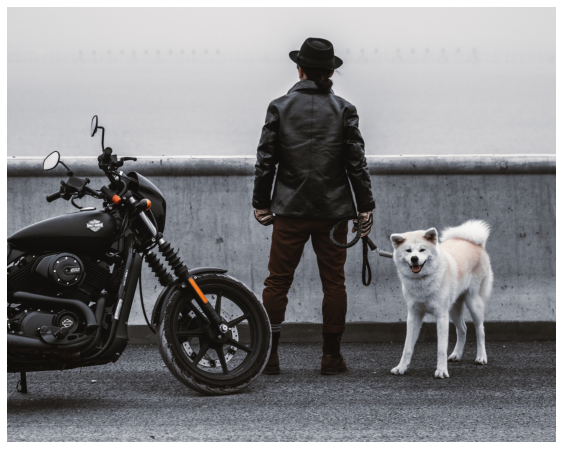

In [7]:
# visualize input image
visualize_image("images/person_with_dog.jpg")

In [ ]:
# create project and dataset
project = api.project.create(workspace.id, "Human Pose Estimation", change_name_if_conflict=True)
dataset = api.dataset.create(project.id, "Person with dog", change_name_if_conflict=True)
print(f"Project {project.id} with dataset {dataset.id} are created")

In [ ]:
# create annotation class
person = sly.ObjClass("person", geometry_type=sly.GraphNodes, geometry_config=template)
project_meta = sly.ProjectMeta(obj_classes=[person])
api.project.update_meta(project.id, project_meta.to_json())

In [ ]:
# upload image
image_info = api.image.upload_path(
    dataset.id, name="person_with_dog.jpg", path="images/person_with_dog.jpg"
)

In [ ]:
# build keypoints graph
nodes = [
    sly.Node(label="nose", row=146, col=670),
    sly.Node(label="left_eye", row=130, col=644),
    sly.Node(label="right_eye", row=135, col=701),
    sly.Node(label="left_ear", row=137, col=642),
    sly.Node(label="right_ear", row=142, col=705),
    sly.Node(label="left_shoulder", row=221, col=595),
    sly.Node(label="right_shoulder", row=226, col=738),
    sly.Node(label="left_elbow", row=335, col=564),
    sly.Node(label="right_elbow", row=342, col=765),
    sly.Node(label="left_wrist", row=429, col=555),
    sly.Node(label="right_wrist", row=438, col=784),
    sly.Node(label="left_hip", row=448, col=620),
    sly.Node(label="right_hip", row=451, col=713),
    sly.Node(label="left_knee", row=598, col=591),
    sly.Node(label="right_knee", row=602, col=715),
    sly.Node(label="left_ankle", row=761, col=573),
    sly.Node(label="right_ankle", row=766, col=709),
]

In [ ]:
# label the image
input_image = sly.image.read("images/person_with_dog.jpg")
img_height, img_width = input_image.shape[:2]
label = sly.Label(sly.GraphNodes(nodes), person)
ann = sly.Annotation(img_size=[img_height, img_width], labels=[label])
api.annotation.upload_ann(image_info.id, ann)

In [ ]:
# download data
image = api.image.download_np(image_info.id)
ann_json = api.annotation.download_json(image_info.id)

In [ ]:
# draw annotation
ann = sly.Annotation.from_json(ann_json, project_meta)
output_path = "images/person_with_dog_labelled.jpg"
ann.draw_pretty(image, output_path=output_path, thickness=7)

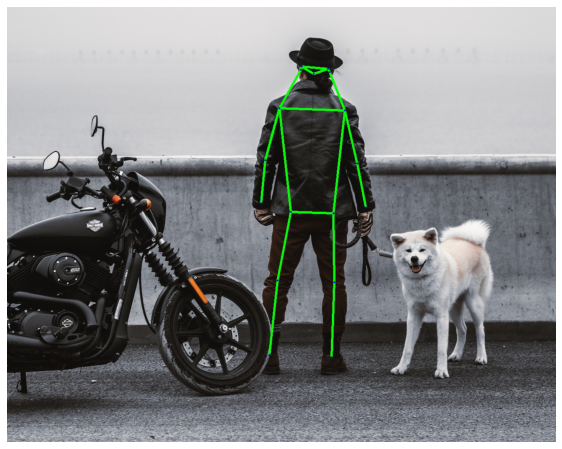

In [5]:
# visualize result
visualize_image(output_path)